# KNN

In [475]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/kc_house_data_clean_knn.csv')
y = df['price']
X = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21 , random_state=42)



# On cree un pipeline de proprocessing pour les variables numériques et une autre pour les variables catégorielles
numeric_features = X.columns # on récupère les noms des variables numériques
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # imputation des valeurs manquantes
        ('standard', StandardScaler()), # standardisation des données
        ('min_max', MinMaxScaler()) # normalisation des données
        ])

# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.linear_model import LinearRegression
knn_4 = LinearRegression()
pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [476]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.9248799410362155

In [477]:
predict_lr_X = trained_pipe.predict(X_test)
df_model = X_test.copy()
df_model['price'] = y_test
df_model['predict_price'] = predict_lr_X.round(0)
df_model = df_model.iloc[:len(df_model)]
df_model[['price', 'predict_price']].head(60)

,price,predict_price
15427,277500.0,350568.0
5076,492450.0,480224.0
5537,516130.0,542424.0
6508,414999.0,423960.0
10574,625000.0,592680.0
7459,575000.0,610328.0
14297,385000.0,454648.0
3798,418000.0,470304.0
13804,426000.0,412592.0
9838,430000.0,487928.0


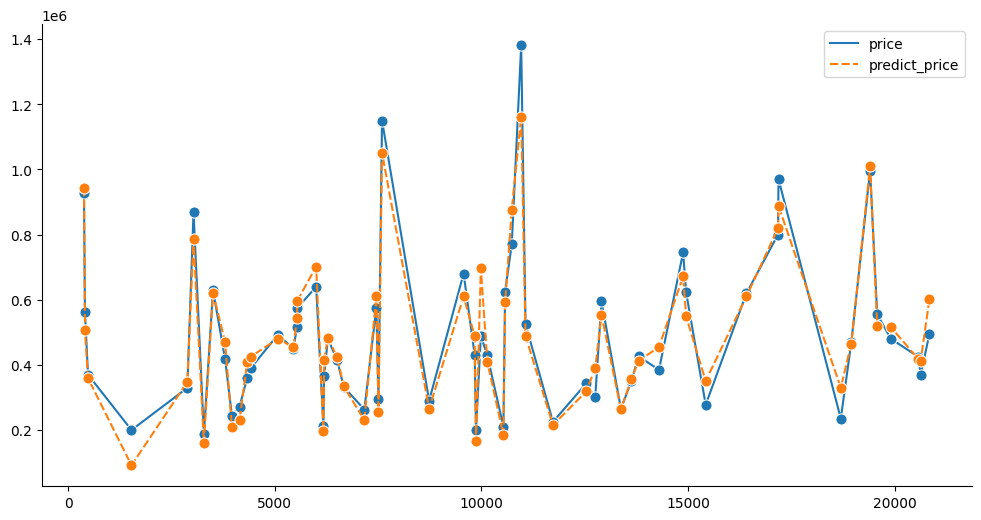

In [478]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_model[['price', 'predict_price']].head(60), ax=ax, marker='o', markersize=8)
sns.despine()

plt.show()

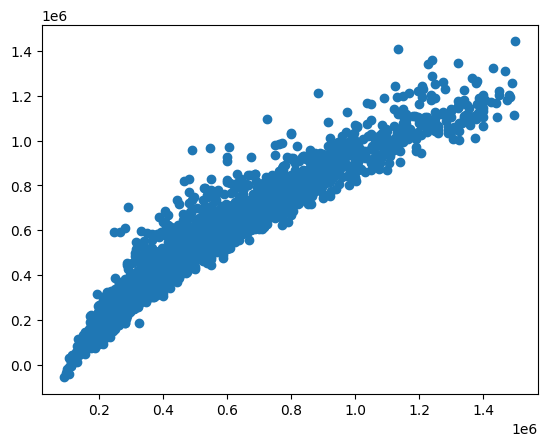

In [479]:
plt.scatter(y_test, predict_lr_X)